# Creating a decision-making algorithm in Python

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset then convert it to a DataFrame
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Explore the dataset
print(df.head())
print(df.info())

   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-

## Preprocess the data

In [3]:
from sklearn.model_selection import train_test_split

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Split the data into features and labels
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Implementing the decision tree algorithm

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

## Evaluate the model

In [5]:
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


## Visualizing the decision tree

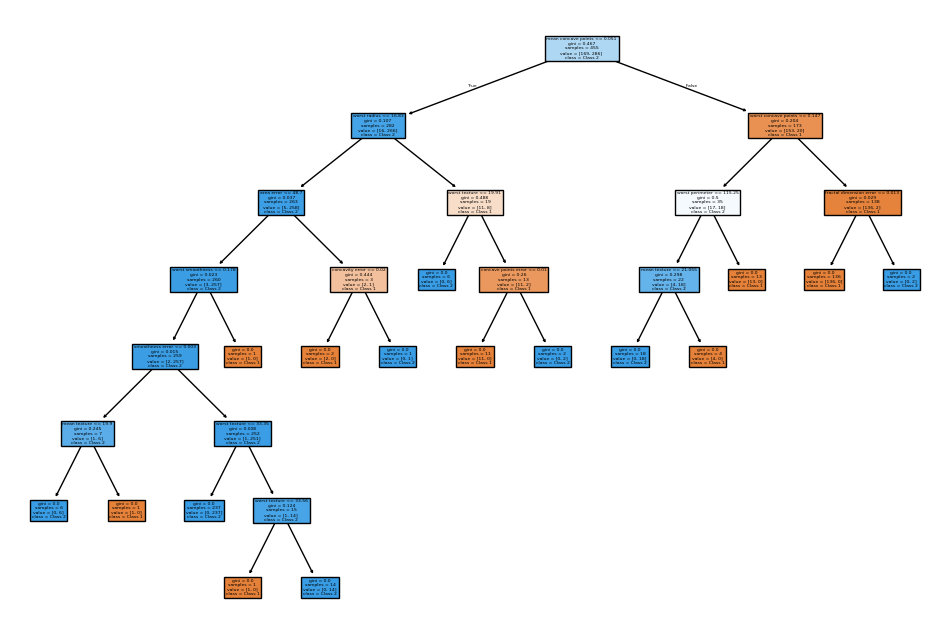

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Class 1', 'Class 2'])
plt.show()